<a href="https://colab.research.google.com/github/sileeee/python_crawling_study/blob/master/%ED%81%AC%EB%A1%A4%EB%A7%81week6(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로봇브라우저로 데이터 수집하기

- requests와 BeutifulSoup으로 수집할 수 없는 웹페이지의 데이터를 수집하는 방법
- 정적페이지/동적페이지의 개념
- 동적페이지에서 데이터를 수집할 수 있는 selenium활용

- 네이버뉴스 검색결과처럼 URL에 따라 정해진 페이지를 불러오는 것을 정적페이지 / 네이버 지도처럼 URL에 관계없이 웹페이지 위에서 데이터를 불러오는 방법을 사용하는 것을 동적 페이지
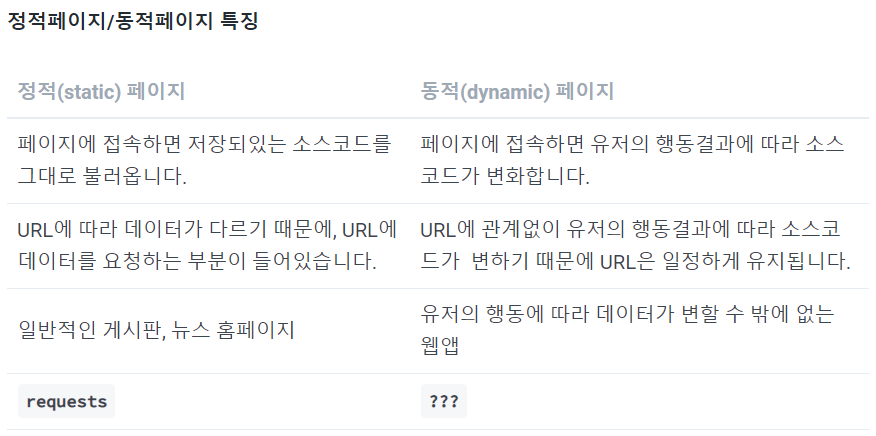

In [3]:
pip install selenium

     |████████████████████████████████| 911kB 2.7MB/s 


### selenium으로 데이터 수집 - 브라우저 자동화 도구

- selenium은 진짜 웹브라우저를 켜서 데이터를 수집하기 때문에 일반적으로 사용하는 chrome이 아닌 파이썬으로 열 수 있는 chrome을 설치해야함
(https://chromedriver.chromium.org/downloads)
chromedriver 다운을 완료했다면 압축을 풀어준 후(실행은 하지 않는다) 작업하려는 소스코드와 같은 위치에 chromediver(or chromedriver.exe)를 복사해서 붙여 넣는다.
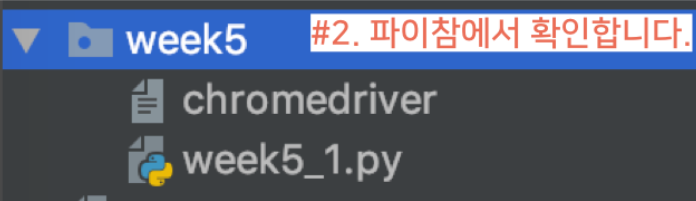

In [ ]:
# 네이버 지도 데이터 수집하기
from selenium import webdriver

driver = webdriver.Chrome("./chromedriver") #다운받은 웹드라이버를 통해 Chrome을 켜겠다는 의미
# 변수 driver는 켜진 웹드라이버를 가리킨다.
# 구버전 네이버지도 접속
driver.get("https://v4.map.naver.com")
#driver.get("https://v4.map.naver.com")은 주소창에 해당하는 주소를 입력하여 URL에 접속하겠다는 의미

### 검색창에 검색어 입력하고 검색버튼 누르기

- 검색창, 검색버튼 선택자 찾기


In [ ]:
driver.find_elements_by_css_selector("button.btn_close")[1].click()

# 검색창에 검색어 입력하기 // 검색창: input#search-input
search_box = driver.find_element_by_css_selector("input#search-input") #원하는 요소/데이터를 선택하는 함수(여러가지 데이터 선택하고 싶을 경우 elements로 변경)
search_box.send_keys("치킨") # 원하는 내용 입력
# 검색버튼 누르기 // 검색버튼: button.spm
search_button = driver.find_element_by_css_selector("button.spm")
search_button.click() #버튼 클릭

### 검색결과 수집하기

검색버튼을 클릭하여 검색결과가 화면에 표시된 이후에는 기존의 requests, bs4를 활용한 방법으로 데이터 수집

In [ ]:
# 컨테이너(가게 정보) 수
stores = driver.find_elements_by_css_selector("div.lsnx")
for store in stores:
    # 세부 데이터 수집(select/ select_one함수를 find_element(s)_by_css_selector로 변경)
    name = store.find_element_by_css_selector("dt > a").text
    addr = store.find_element_by_css_selector("dd.addr").text
    phone = store.find_element_by_css_selector("dd.tel").text
    
    print(name, addr, phone)

### 지연시간 주기
위의 코드를 실행했을 때, 에러가 발생하거나 데이터가 수집되지 않는 경우가 있을 수 있다. requests를 사용하는 경우 소스코드를 한번에 가져와서 데이터를 수집하기 때문에 시간에 대한 이슈가 발생하지 않지만, selenium의 경우에는 웹브라우저를 직접 실행해서 데이터를 수집하기 때문에 컴퓨터의 성능이나 네트워크 상황에 따라 데이터를 늦게 불러오게되는 경우가 있다.
프로그래밍 언어는 1초에도 수백/수천줄의 코드를 실행하기 때문에 아직 데이터가 완전히 불러오기 전에 데이터를 읽어오려고한다면 정상적으로 데이터를 수집할 수 없게 된다.
- 파이썬 내부라이브러리 time을 활용해서 데이터 수집 중 지연시간을 줄 수 있다.
**참고하면 좋은 내용: implicitly wait, explicitly wait

In [ ]:
# 네이버 지도 데이터 수집하기
from selenium import webdriver

##################################################
# 파이썬 내부 라이브러리 time을 사용합니다.
# time: 시간과 관련된 여러가지 기능을 포함합니다.
import time
##################################################

driver = webdriver.Chrome("./chromedriver")
# 구버전 네이버지도 접속
driver.get("https://v4.map.naver.com")
# !!!추가//네이버 지도 업데이트 후 안내메시지 끄기##########
# 무시하고 진행해주세요.
driver.find_elements_by_css_selector("button.btn_close")[1].click()
##################################################

#3. 검색창에 검색어 입력하기 // 검색창: input#search-input
search_box = driver.find_element_by_css_selector("input#search-input")
search_box.send_keys("치킨")
#4. 검색버튼 누르기 // 검색버튼: button.spm
search_button = driver.find_element_by_css_selector("button.spm")
search_button.click()

##################################################
# 1초의 지연시간을 줍니다. 괄호 안에 입력한 시간동안 다음 코드를 실행하지 않고 기다린다.
time.sleep(1)
##################################################

# 컨테이너(가게 정보) 수
stores = driver.find_elements_by_css_selector("div.lsnx")
for store in stores:
    # 세부 데이터 수집
    name = store.find_element_by_css_selector("dt > a").text
    addr = store.find_element_by_css_selector("dd.addr").text
    phone = store.find_element_by_css_selector("dd.tel").text

    print(name, addr, phone)

### 추가)드라이버 닫기

데이터 수집이 종료된 후에 브라우저를 닫고 싶다면 프로그램 종료 전에 아래 코드를 추가
```
driver.close()
```

## 파파고 번역 이용 프로세스

1) 파파고 서비스 페이지에 접속한다.
2) 입력창에 키워드(seize the day)를 입력한다.
3) 번역버튼을 누른다.
--- 지연 ---
4) 번역된 결과를 확인한다.

In [ ]:
from selenium import webdriver
import time

# 크롬창(웹드라이버) 열기
driver = webdriver.Chrome("./chromedriver")

# 파파고 페이지 접속
driver.get("https://papago.naver.com")

# 페이지 접속 후 시간 지연
time.sleep(0.5)

# 입력창에 검색어 입력
input_box = driver.find_element_by_css_selector("textarea#txtSource")
input_box.send_keys("seize the day")

# 번역 버튼 클릭
button = driver.find_element_by_css_selector("button#btnTranslate")
button.click()

# 버튼 클릭 후 시간 지연 & 검색결과 출력
time.sleep(0.5)
result = driver.find_element_by_css_selector("div#txtTarget").text
print(result)

# 크롬창 닫기
# driver.close()
